## Homework. Deep Learning.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

2022-11-21 22:37:01.039318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 22:37:01.609718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-21 22:37:01.609829: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-21 22:37:01.609837: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
print(f"numpy version: {np.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(tf.config.list_logical_devices())

numpy version: 1.23.4
tensorflow version: 2.11.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2022-11-21 22:37:02.438086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 22:37:02.450704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 22:37:02.450757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 22:37:02.451826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [3]:
PATH_TRAIN = './train'
PATH_TEST = './test'

## Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

Structure:  
- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
  - Use 32 filters
  - Kernel size should be (3, 3) (that's the size of the filter)
  - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
  - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
  - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:
- SGD(lr=0.002, momentum=0.8)

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.Adam(learning_rate=0.002),
             metrics=['accuracy'])

### Question 1

Binary classification problem, what is the best loss function?  
__*binary crossentropy*__

### Question 2
What's the total number of parameters of the model? You can use the summary method for that.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

## Generators and Training

In [6]:
train_generator = ImageDataGenerator(rescale=1./255)

print("Train:")
train_data_flow = train_generator.flow_from_directory(
    PATH_TRAIN,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)
print(f"classes {train_data_flow.class_indices}")

val_generator = ImageDataGenerator(rescale=1./255)

print("\nTest:") 
val_data_flow = val_generator.flow_from_directory(
    PATH_TEST,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)
print(f"classes {val_data_flow.class_indices}")


Train:
Found 1594 images belonging to 2 classes.
classes {'dino': 0, 'dragon': 1}

Test:
Found 394 images belonging to 2 classes.
classes {'dino': 0, 'dragon': 1}


Train model

In [7]:
history = model.fit(
    train_data_flow,
    epochs=10,
    validation_data=val_data_flow
)

Epoch 1/10


2022-11-21 22:37:04.933559: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2022-11-21 22:37:05.565342: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f01b9ede3d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-21 22:37:05.565381: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro T1000 with Max-Q Design, Compute Capability 7.5
2022-11-21 22:37:05.569348: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-11-21 22:37:05.666943: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 [==============================] - 6s 39ms/step - loss: 1.1023 - accuracy: 0.6738 - val_loss: 0.3569 - val_accuracy: 0.8528
Epoch 2/10
80/80 [==============================] - 3s 37ms/step - loss: 0.2531 - accuracy: 0.9065 - val_loss: 0.4480 - val_accuracy: 0.8122
Epoch 3/10
80/80 [==============================] - 3s 37ms/step - loss: 0.0719 - accuracy: 0.9824 - val_loss: 0.2794 - val_accuracy: 0.9036
Epoch 4/10
80/80 [==============================] - 3s 38ms/step - loss: 0.0332 - accuracy: 0.9950 - val_loss: 0.3319 - val_accuracy: 0.9036
Epoch 5/10
80/80 [==============================] - 3s 37ms/step - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.4827 - val_accuracy: 0.8756
Epoch 6/10
80/80 [==============================] - 3s 37ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.3439 - val_accuracy: 0.8807
Epoch 7/10
80/80 [==============================] - 3s 37ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3483 - val_accuracy: 0.8909
Epoch 8/10
80/80 [======

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

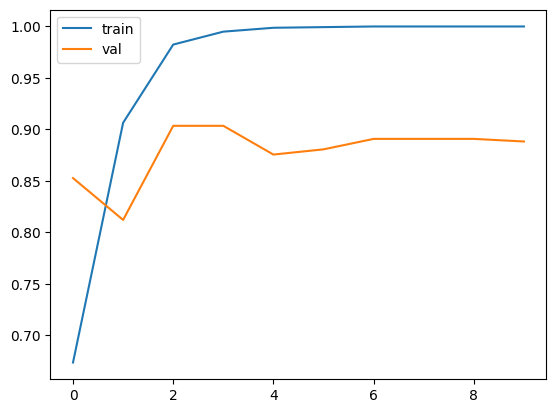

In [9]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

### Question 3
What is the median of training accuracy for all the epochs for this model?

In [10]:
np.median(acc)

0.9990589916706085

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [11]:
np.std(loss)

0.32680055338771885

## Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:
- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [12]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

train_data_flow = train_generator.flow_from_directory(
    PATH_TRAIN,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [13]:
val_generator = ImageDataGenerator(rescale=1./255)

val_data_flow = val_generator.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [14]:
history_aug = model.fit(
    train_data_flow,
    epochs=10,
    validation_data=val_data_flow
)

Epoch 1/10
80/80 [==============================] - 8s 102ms/step - loss: 0.4723 - accuracy: 0.8080 - val_loss: 0.3381 - val_accuracy: 0.8503
Epoch 2/10
80/80 [==============================] - 8s 95ms/step - loss: 0.4245 - accuracy: 0.8199 - val_loss: 0.2853 - val_accuracy: 0.8883
Epoch 3/10
80/80 [==============================] - 8s 96ms/step - loss: 0.3982 - accuracy: 0.8269 - val_loss: 0.2913 - val_accuracy: 0.8655
Epoch 4/10
80/80 [==============================] - 7s 93ms/step - loss: 0.3289 - accuracy: 0.8595 - val_loss: 0.7401 - val_accuracy: 0.7437
Epoch 5/10
80/80 [==============================] - 8s 94ms/step - loss: 0.3379 - accuracy: 0.8563 - val_loss: 0.6875 - val_accuracy: 0.7157
Epoch 6/10
80/80 [==============================] - 8s 96ms/step - loss: 0.3449 - accuracy: 0.8614 - val_loss: 0.4150 - val_accuracy: 0.8274
Epoch 7/10
80/80 [==============================] - 8s 99ms/step - loss: 0.3199 - accuracy: 0.8733 - val_loss: 0.3088 - val_accuracy: 0.8731
Epoch 8/10
8

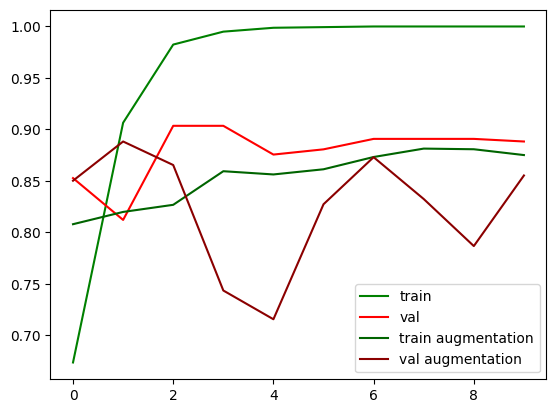

In [15]:
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.plot(history_aug.history['accuracy'], color='darkgreen', label='train augmentation')
plt.plot(history_aug.history['val_accuracy'], color='darkred', label='val augmentation')
plt.legend()
plt.show()

### Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [16]:
np.mean(val_loss)

0.3704923212528229

### Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [17]:
np.average(val_acc[5:])

0.8883248686790466